In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

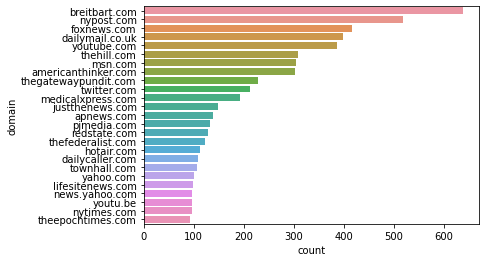

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

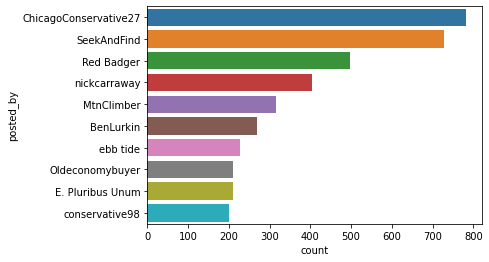

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain         \
                                            count unique   
domain               posted_by                             
americanthinker.com  E. Pluribus Unum           4      1   
                     MtnClimber               142      1   
                     Red Badger                 1      1   
                     SeekAndFind              126      1   
                     conservative98             2      1   
                     ebb tide                   1      1   
apnews.com           E. Pluribus Unum           1      1   
                     Red Badger                 2      1   
                     conservative98             1      1   
                     ebb tide                   1      1   
                     ChicagoConservative27      1      1   
                     Oldeconomybuyer           46      1   
                     nickcarraway               1      1   
breitbart.com        E. Pluribus Unum          16      1   
                     Red Badger                 3      1   
                     SeekAndFind                1      1   
                     conservative98            23      1   
                     ebb tide                   1      1   
                     ChicagoConservative27    421      1   
dailycaller.com      E. Pluribus Unum           1      1   
                     Red Badger                29      1   
                     SeekAndFind                1      1   
                     conservative98             2      1   
dailymail.co.uk      E. Pluribus Unum           1      1   
                     Red Badger                10      1   
                     SeekAndFind                2      1   
                     conservative98             5      1   
                     ebb tide                   1      1   
                     nickcarraway               4      1   
                     BenLurkin                  1      1   
foxnews.com          E. Pluribus Unum           4      1   
                     MtnClimber                 3      1   
                     Red Badger                 4      1   
                     SeekAndFind                2      1   
                     conservative98            35      1   
                     ebb tide                   3      1   
                     ChicagoConservative27     20      1   
                     Oldeconomybuyer            8      1   
                     nickcarraway              11      1   
                     BenLurkin                  9      1   
hotair.com           MtnClimber                 1      1   
                     SeekAndFind               89      1   
justthenews.com      E. Pluribus Unum          77      1   
                     Red Badger                 9      1   
                     SeekAndFind                3      1   
                     conservative98             1      1   
lifesitenews.com     ebb tide                  31      1   
medicalxpress.com    Red Badger                 1      1   
msn.com              E. Pluribus Unum           1      1   
                     Red Badger                 2      1   
                     SeekAndFind                3      1   
                     conservative98             2      1   
                     ebb tide                   1      1   
                     Oldeconomybuyer           11      1   
                     nickcarraway               2      1   
                     BenLurkin                  1      1   
news.yahoo.com       E. Pluribus Unum           1      1   
                     Red Badger                 3      1   
                     SeekAndFind                4      1   
                     conservative98             2      1   
                     Oldeconomybuyer           23      1   
                     nickcarraway               3      1   
nypost.com           E. Pluribus Unum           8      1   
                     MtnClimber                 2      1   
                     Re

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
"LIVE! From the D.C.Swamp, It's FRIDAY NIGHT! The Election of The Speaker of the U.S. House of Representatives: Day IV, The Night Cap-Round 14.",2023-01-07 05:24:07,568.0
2023 State of the Union [ Live ],2023-02-08 03:01:22,477.0
Looks like the Bills Player died on the Field of DIED SUDDENLY,2023-01-03 04:34:07,251.0
Damar Hamlin collapses on field; Bills-Bengals temporarily suspended,2023-01-03 07:03:12,233.0
"Harley-Davidson Will Go All-Electric, Says CEO",2023-01-19 19:56:34,226.0
Live thread. Memphis Police release Tyre Nichols Video. Warning Graphic,2023-01-28 02:07:38,207.0
"Chinese balloon advanced, hard to shoot down: US expert",2023-02-04 16:20:04,166.0
Alec Baldwin Will Be Charged With Involuntary Manslaughter in ‘Rust’ Killing,2023-01-19 19:17:39,162.0
Paul Pelosi video shows hammer attack after police arrive.,2023-01-27 19:37:14,160.0
